In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./sets/")

/Users/daniel/Workspace/Checkouts/python-ml/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Instructions for updating:
Please write your own downloading logic.


Instructions for updating:
Please use tf.data to implement this functionality.


Extracting ./sets/train-images-idx3-ubyte.gz


Instructions for updating:
Please use tf.data to implement this functionality.


Extracting ./sets/train-labels-idx1-ubyte.gz
Extracting ./sets/t10k-images-idx3-ubyte.gz
Extracting ./sets/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
import tensorflow as tf
from functools import partial
import sys

n_inputs = 28 * 28 # MNIST
n_hidden1 = 300
n_hidden2 = 150
n_hidden3 = n_hidden1
n_outputs = n_inputs

learning_rate = 0.01
l2_reg = 0.0001

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
he_init = tf.contrib.layers.variance_scaling_initializer()
l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
my_dense_layer = partial(tf.layers.dense,
                         activation=tf.nn.elu,
                         kernel_initializer=he_init,
                         kernel_regularizer=l2_regularizer)

hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)
outputs = my_dense_layer(hidden3, n_outputs, activation = None)

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) # MSE
reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.add_n([reconstruction_loss] + reg_losses)

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

n_epochs = 5
batch_size = 150

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="") # not shown in the book
            sys.stdout.flush()                                          # not shown
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        loss_train = reconstruction_loss.eval(feed_dict={X: X_batch})   # not shown
        print("\r{}".format(epoch), "Train MSE:", loss_train)           # not shown
        saver.save(sess, "./my_model_all_layers.ckpt")                  # not shown
        

0%

0%

0%

0%

1%

1%

1%

1%

2%

2%

2%

3%

3%

3%

3%

4%

4%

4%

4%

5%

5%

5%

6%

6%

6%

6%

7%

7%

7%

7%

8%

8%

8%

9%

9%

9%

9%

10%

10%

10%

10%

11%

11%

11%

12%

12%

12%

12%

13%

13%

13%

13%

14%

14%

14%

15%

15%

15%

15%

16%

16%

16%

16%

17%

17%

17%

18%

18%

18%

18%

19%

19%

19%

19%

20%

20%

20%

21%

21%

21%

21%

22%

22%

22%

22%

23%

23%

23%

24%

24%

24%

24%

25%

25%

25%

25%

26%

26%

26%

27%

27%

27%

27%

28%

28%

28%

28%

29%

29%

29%

30%

30%

30%

30%

31%

31%

31%

31%

32%

32%

32%

33%

33%

33%

33%

34%

34%

34%

34%

35%

35%

35%

36%

36%

36%

36%

37%

37%

37%

37%

38%

38%

38%

39%

39%

39%

39%

40%

40%

40%

40%

41%

41%

41%

42%

42%

42%

42%

43%

43%

43%

43%

44%

44%

44%

45%

45%

45%

45%

46%

46%

46%

46%

47%

47%

47%

48%

48%

48%

48%

49%

49%

49%

50%

50%

50%

50%

51%

51%

51%

51%

52%

52%

52%

53%

53%

53%

53%

54%

54%

54%

54%

55%

55%

55%

56%

56%

56%

56%

57%

57%

57%

57%

58%

58%

58%

59%

59%

59%

59%

60%

60%

60%

60%

61%

61%

61%

62%

62%

62%

62%

63%

63%

63%

63%

64%

64%

64%

65%

65%

65%

65%

66%

66%

66%

66%

67%

67%

67%

68%

68%

68%

68%

69%

69%

69%

69%

70%

70%

70%

71%

71%

71%

71%

72%

72%

72%

72%

73%

73%

73%

74%

74%

74%

74%

75%

75%

75%

75%

76%

76%

76%

77%

77%

77%

77%

78%

78%

78%

78%

79%

79%

79%

80%

80%

80%

80%

81%

81%

81%

81%

82%

82%

82%

83%

83%

83%

83%

84%

84%

84%

84%

85%

85%

85%

86%

86%

86%

86%

87%

87%

87%

87%

88%

88%

88%

89%

89%

89%

89%

90%

90%

90%

90%

91%

91%

91%

92%

92%

92%

92%

93%

93%

93%

93%

94%

94%

94%

95%

95%

95%

95%

96%

96%

96%

96%

97%

97%

97%

98%

98%

98%

98%

99%

99%

99%

0 Train MSE: 0.024493512


0%

0%

0%

0%

1%

1%

1%

1%

2%

2%

2%

3%

3%

3%

3%

4%

4%

4%

4%

5%

5%

5%

6%

6%

6%

6%

7%

7%

7%

7%

8%

8%

8%

9%

9%

9%

9%

10%

10%

10%

10%

11%

11%

11%

12%

12%

12%

12%

13%

13%

13%

13%

14%

14%

14%

15%

15%

15%

15%

16%

16%

16%

16%

17%

17%

17%

18%

18%

18%

18%

19%

19%

19%

19%

20%

20%

20%

21%

21%

21%

21%

22%

22%

22%

22%

23%

23%

23%

24%

24%

24%

24%

25%

25%

25%

25%

26%

26%

26%

27%

27%

27%

27%

28%

28%

28%

28%

29%

29%

29%

30%

30%

30%

30%

31%

31%

31%

31%

32%

32%

32%

33%

33%

33%

33%

34%

34%

34%

34%

35%

35%

35%

36%

36%

36%

36%

37%

37%

37%

37%

38%

38%

38%

39%

39%

39%

39%

40%

40%

40%

40%

41%

41%

41%

42%

42%

42%

42%

43%

43%

43%

43%

44%

44%

44%

45%

45%

45%

45%

46%

46%

46%

46%

47%

47%

47%

48%

48%

48%

48%

49%

49%

49%

50%

50%

50%

50%

51%

51%

51%

51%

52%

52%

52%

53%

53%

53%

53%

54%

54%

54%

54%

55%

55%

55%

56%

56%

56%

56%

57%

57%

57%

57%

58%

58%

58%

59%

59%

59%

59%

60%

60%

60%

60%

61%

61%

61%

62%

62%

62%

62%

63%

63%

63%

63%

64%

64%

64%

65%

65%

65%

65%

66%

66%

66%

66%

67%

67%

67%

68%

68%

68%

68%

69%

69%

69%

69%

70%

70%

70%

71%

71%

71%

71%

72%

72%

72%

72%

73%

73%

73%

74%

74%

74%

74%

75%

75%

75%

75%

76%

76%

76%

77%

77%

77%

77%

78%

78%

78%

78%

79%

79%

79%

80%

80%

80%

80%

81%

81%

81%

81%

82%

82%

82%

83%

83%

83%

83%

84%

84%

84%

84%

85%

85%

85%

86%

86%

86%

86%

87%

87%

87%

87%

88%

88%

88%

89%

89%

89%

89%

90%

90%

90%

90%

91%

91%

91%

92%

92%

92%

92%

93%

93%

93%

93%

94%

94%

94%

95%

95%

95%

95%

96%

96%

96%

96%

97%

97%

97%

98%

98%

98%

98%

99%

99%

99%

1 Train MSE: 0.012892013


0%

0%

0%

0%

1%

1%

1%

1%

2%

2%

2%

3%

3%

3%

3%

4%

4%

4%

4%

5%

5%

5%

6%

6%

6%

6%

7%

7%

7%

7%

8%

8%

8%

9%

9%

9%

9%

10%

10%

10%

10%

11%

11%

11%

12%

12%

12%

12%

13%

13%

13%

13%

14%

14%

14%

15%

15%

15%

15%

16%

16%

16%

16%

17%

17%

17%

18%

18%

18%

18%

19%

19%

19%

19%

20%

20%

20%

21%

21%

21%

21%

22%

22%

22%

22%

23%

23%

23%

24%

24%

24%

24%

25%

25%

25%

25%

26%

26%

26%

27%

27%

27%

27%

28%

28%

28%

28%

29%

29%

29%

30%

30%

30%

30%

31%

31%

31%

31%

32%

32%

32%

33%

33%

33%

33%

34%

34%

34%

34%

35%

35%

35%

36%

36%

36%

36%

37%

37%

37%

37%

38%

38%

38%

39%

39%

39%

39%

40%

40%

40%

40%

41%

41%

41%

42%

42%

42%

42%

43%

43%

43%

43%

44%

44%

44%

45%

45%

45%

45%

46%

46%

46%

46%

47%

47%

47%

48%

48%

48%

48%

49%

49%

49%

50%

50%

50%

50%

51%

51%

51%

51%

52%

52%

52%

53%

53%

53%

53%

54%

54%

54%

54%

55%

55%

55%

56%

56%

56%

56%

57%

57%

57%

57%

58%

58%

58%

59%

59%

59%

59%

60%

60%

60%

60%

61%

61%

61%

62%

62%

62%

62%

63%

63%

63%

63%

64%

64%

64%

65%

65%

65%

65%

66%

66%

66%

66%

67%

67%

67%

68%

68%

68%

68%

69%

69%

69%

69%

70%

70%

70%

71%

71%

71%

71%

72%

72%

72%

72%

73%

73%

73%

74%

74%

74%

74%

75%

75%

75%

75%

76%

76%

76%

77%

77%

77%

77%

78%

78%

78%

78%

79%

79%

79%

80%

80%

80%

80%

81%

81%

81%

81%

82%

82%

82%

83%

83%

83%

83%

84%

84%

84%

84%

85%

85%

85%

86%

86%

86%

86%

87%

87%

87%

87%

88%

88%

88%

89%

89%

89%

89%

90%

90%

90%

90%

91%

91%

91%

92%

92%

92%

92%

93%

93%

93%

93%

94%

94%

94%

95%

95%

95%

95%

96%

96%

96%

96%

97%

97%

97%

98%

98%

98%

98%

99%

99%

99%

2 Train MSE: 0.010418598


0%

0%

0%

0%

1%

1%

1%

1%

2%

2%

2%

3%

3%

3%

3%

4%

4%

4%

4%

5%

5%

5%

6%

6%

6%

6%

7%

7%

7%

7%

8%

8%

8%

9%

9%

9%

9%

10%

10%

10%

10%

11%

11%

11%

12%

12%

12%

12%

13%

13%

13%

13%

14%

14%

14%

15%

15%

15%

15%

16%

16%

16%

16%

17%

17%

17%

18%

18%

18%

18%

19%

19%

19%

19%

20%

20%

20%

21%

21%

21%

21%

22%

22%

22%

22%

23%

23%

23%

24%

24%

24%

24%

25%

25%

25%

25%

26%

26%

26%

27%

27%

27%

27%

28%

28%

28%

28%

29%

29%

29%

30%

30%

30%

30%

31%

31%

31%

31%

32%

32%

32%

33%

33%

33%

33%

34%

34%

34%

34%

35%

35%

35%

36%

36%

36%

36%

37%

37%

37%

37%

38%

38%

38%

39%

39%

39%

39%

40%

40%

40%

40%

41%

41%

41%

42%

42%

42%

42%

43%

43%

43%

43%

44%

44%

44%

45%

45%

45%

45%

46%

46%

46%

46%

47%

47%

47%

48%

48%

48%

48%

49%

49%

49%

50%

50%

50%

50%

51%

51%

51%

51%

52%

52%

52%

53%

53%

53%

53%

54%

54%

54%

54%

55%

55%

55%

56%

56%

56%

56%

57%

57%

57%

57%

58%

58%

58%

59%

59%

59%

59%

60%

60%

60%

60%

61%

61%

61%

62%

62%

62%

62%

63%

63%

63%

63%

64%

64%

64%

65%

65%

65%

65%

66%

66%

66%

66%

67%

67%

67%

68%

68%

68%

68%

69%

69%

69%

69%

70%

70%

70%

71%

71%

71%

71%

72%

72%

72%

72%

73%

73%

73%

74%

74%

74%

74%

75%

75%

75%

75%

76%

76%

76%

77%

77%

77%

77%

78%

78%

78%

78%

79%

79%

79%

80%

80%

80%

80%

81%

81%

81%

81%

82%

82%

82%

83%

83%

83%

83%

84%

84%

84%

84%

85%

85%

85%

86%

86%

86%

86%

87%

87%

87%

87%

88%

88%

88%

89%

89%

89%

89%

90%

90%

90%

90%

91%

91%

91%

92%

92%

92%

92%

93%

93%

93%

93%

94%

94%

94%

95%

95%

95%

95%

96%

96%

96%

96%

97%

97%

97%

98%

98%

98%

98%

99%

99%

99%

3 Train MSE: 0.010011336


0%

0%

0%

0%

1%

1%

1%

1%

2%

2%

2%

3%

3%

3%

3%

4%

4%

4%

4%

5%

5%

5%

6%

6%

6%

6%

7%

7%

7%

7%

8%

8%

8%

9%

9%

9%

9%

10%

10%

10%

10%

11%

11%

11%

12%

12%

12%

12%

13%

13%

13%

13%

14%

14%

14%

15%

15%

15%

15%

16%

16%

16%

16%

17%

17%

17%

18%

18%

18%

18%

19%

19%

19%

19%

20%

20%

20%

21%

21%

21%

21%

22%

22%

22%

22%

23%

23%

23%

24%

24%

24%

24%

25%

25%

25%

25%

26%

26%

26%

27%

27%

27%

27%

28%

28%

28%

28%

29%

29%

29%

30%

30%

30%

30%

31%

31%

31%

31%

32%

32%

32%

33%

33%

33%

33%

34%

34%

34%

34%

35%

35%

35%

36%

36%

36%

36%

37%

37%

37%

37%

38%

38%

38%

39%

39%

39%

39%

40%

40%

40%

40%

41%

41%

41%

42%

42%

42%

42%

43%

43%

43%

43%

44%

44%

44%

45%

45%

45%

45%

46%

46%

46%

46%

47%

47%

47%

48%

48%

48%

48%

49%

49%

49%

50%

50%

50%

50%

51%

51%

51%

51%

52%

52%

52%

53%

53%

53%

53%

54%

54%

54%

54%

55%

55%

55%

56%

56%

56%

56%

57%

57%

57%

57%

58%

58%

58%

59%

59%

59%

59%

60%

60%

60%

60%

61%

61%

61%

62%

62%

62%

62%

63%

63%

63%

63%

64%

64%

64%

65%

65%

65%

65%

66%

66%

66%

66%

67%

67%

67%

68%

68%

68%

68%

69%

69%

69%

69%

70%

70%

70%

71%

71%

71%

71%

72%

72%

72%

72%

73%

73%

73%

74%

74%

74%

74%

75%

75%

75%

75%

76%

76%

76%

77%

77%

77%

77%

78%

78%

78%

78%

79%

79%

79%

80%

80%

80%

80%

81%

81%

81%

81%

82%

82%

82%

83%

83%

83%

83%

84%

84%

84%

84%

85%

85%

85%

86%

86%

86%

86%

87%

87%

87%

87%

88%

88%

88%

89%

89%

89%

89%

90%

90%

90%

90%

91%

91%

91%

92%

92%

92%

92%

93%

93%

93%

93%

94%

94%

94%

95%

95%

95%

95%

96%

96%

96%

96%

97%

97%

97%

98%

98%

98%

98%

99%

99%

99%

4 Train MSE: 0.009830297


INFO:tensorflow:Restoring parameters from ./my_model_all_layers.ckpt


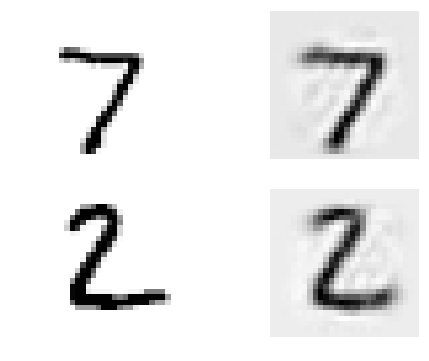

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_image(image, shape=[28, 28]):
    plt.imshow(image.reshape(shape), cmap="Greys", interpolation="nearest")
    plt.axis("off")

def show_reconstructed_digits(X, outputs, model_path = None, n_test_digits = 2):
    with tf.Session() as sess:
        if model_path:
            saver.restore(sess, model_path)
        X_test = mnist.test.images[:n_test_digits]
        outputs_val = outputs.eval(feed_dict={X: X_test})

    fig = plt.figure(figsize=(8, 3 * n_test_digits))
    for digit_index in range(n_test_digits):
        plt.subplot(n_test_digits, 2, digit_index * 2 + 1)
        plot_image(X_test[digit_index])
        plt.subplot(n_test_digits, 2, digit_index * 2 + 2)
        plot_image(outputs_val[digit_index])

show_reconstructed_digits(X, outputs, "./my_model_all_layers.ckpt")